In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings


In [161]:
dataset=pd.read_csv("data/StudentsPerformance.csv")

In [162]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [163]:
X=dataset.drop(columns=["math score"],axis=1)

In [164]:
Y=dataset["math score"]

In [165]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [166]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [167]:
numeric_data=X.select_dtypes(exclude="object").columns
categorical_data=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transform=StandardScaler()
cat_transform=OneHotEncoder()

preprocessor=ColumnTransformer(

[
   ("OneHotEncoder",cat_transform,categorical_data),
   ("StandardScaler",num_transform,numeric_data),
]  
)


In [168]:
X=preprocessor.fit_transform(X)

In [169]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [170]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=40)

In [171]:
x_train.shape,x_test.shape

((700, 19), (300, 19))

In [177]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mse,mae,rmse,r2_square
 

In [178]:
models={

    "Linear model":LinearRegression(),
    "XGBoost":XGBRegressor(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "K-neigbours":KNeighborsRegressor(),
    "CatBoost":CatBoostRegressor(),
    "AdaBoost":AdaBoostRegressor()
}

model_list=[]
r2_list=[]



for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)


    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)


    model_train_mse,model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mse,model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("MODEL PERFORMANCE FOR TRAINING DATASET")
    print("mean_squared_error  :{:.4f}".format(model_train_mse))
    print("mean ansolute error  :{:.4f}".format(model_train_mae))
    print("Root mean squared error  :{:.4f}".format(model_train_rmse))
    print("R2 score  :{:.4f}".format(model_train_r2))

    print("-----------------------------------------------")


    print("MODEL PERFORMANCE FOR TEST DATASET")
    print("mean_squared_error  :{:.4f}".format(model_test_mse))
    print("mean ansolute error  :{:.4f}".format(model_test_mae))
    print("Root mean squared error  :{:.4f}".format(model_test_rmse))
    print("R2 score  :{:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")



Linear model
MODEL PERFORMANCE FOR TRAINING DATASET
mean_squared_error  :27.5606
mean ansolute error  :4.1535
Root mean squared error  :5.2498
R2 score  :0.8779
-----------------------------------------------
MODEL PERFORMANCE FOR TEST DATASET
mean_squared_error  :30.7082
mean ansolute error  :4.4945
Root mean squared error  :5.5415
R2 score  :0.8713


XGBoost
MODEL PERFORMANCE FOR TRAINING DATASET
mean_squared_error  :0.6722
mean ansolute error  :0.5500
Root mean squared error  :0.8199
R2 score  :0.9970
-----------------------------------------------
MODEL PERFORMANCE FOR TEST DATASET
mean_squared_error  :43.2617
mean ansolute error  :5.3062
Root mean squared error  :6.5774
R2 score  :0.8187


Ridge
MODEL PERFORMANCE FOR TRAINING DATASET
mean_squared_error  :27.5640
mean ansolute error  :4.1515
Root mean squared error  :5.2501
R2 score  :0.8779
-----------------------------------------------
MODEL PERFORMANCE FOR TEST DATASET
mean_squared_error  :30.7048
mean ansolute error  :4.4936
R

In [180]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
2,Ridge,0.871306
0,Linear model,0.871292
7,CatBoost,0.852601
5,Random Forest,0.836433
8,AdaBoost,0.826743
1,XGBoost,0.818677
6,K-neigbours,0.810472
3,Lasso,0.799526
4,Decision Tree,0.743743


In [181]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 87.13


Text(0, 0.5, 'Prediction')

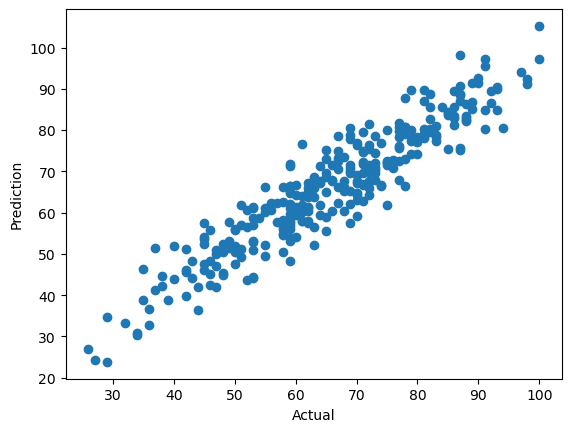

In [182]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")

<Axes: xlabel='math score'>

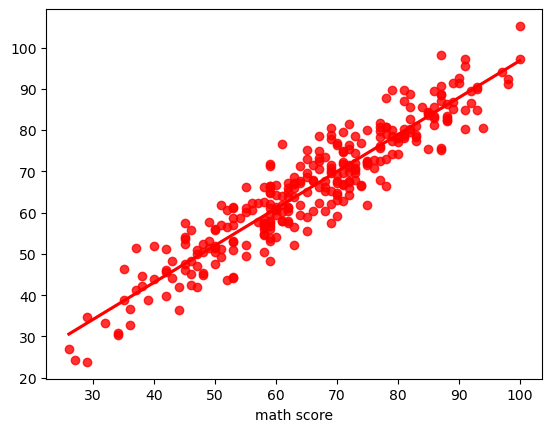

In [183]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

In [184]:
pred_data=pd.DataFrame({"actual value":y_test,"predicted data":y_pred,"difference":y_test-y_pred})

In [185]:
pred_data

,actual value,predicted data,difference
204,59,48.335698,10.664302
71,63,63.730040,-0.730040
594,92,86.663403,5.336597
672,69,69.611332,-0.611332
14,50,47.661291,2.338709
...,...,...,...
750,71,71.740472,-0.740472
876,81,89.698769,-8.698769
426,86,89.451018,-3.451018
723,50,50.527996,-0.527996
